In [308]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
warnings.filterwarnings(action="ignore")

## Exploratory Analysis

In [340]:
# Import train and test data from excels
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#drop first four

In [310]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [311]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [343]:
#Analsis from both train data and test data directs that we can drop the following columns - PoolQC, MiscFeature, Alley, Fence

train_data = train_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1) #drop columns
test_data = test_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1) #drop columns

#Keep test_id separated
test_id = test_data['Id']

In [313]:
# Analyzing the target
print(train_data['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


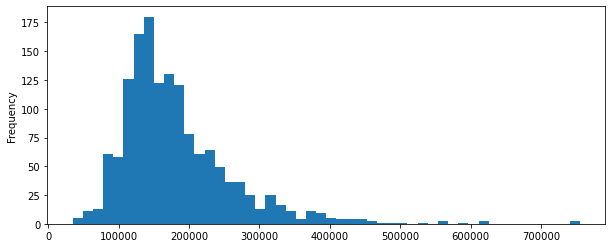

In [314]:
# Sale Price in train_data is right-skewed based on histogram
train_data['SalePrice'].plot(kind='hist', figsize = (10,4), bins =50)

In [315]:
#Checking skewness and kurtosis of target
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [341]:
# As right skewness observed, applying log transformation on target value
Y_trans = np.log1p(train_data['SalePrice'])

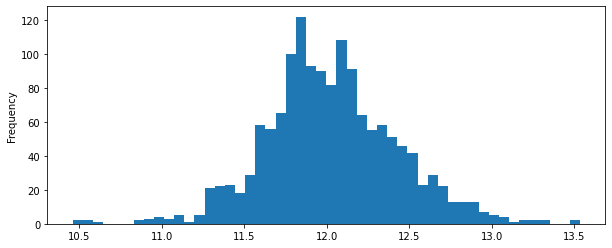

In [342]:
# Sale Price in normally distributed and no skew-ness based on histogram
Y_trans.plot(kind='hist', figsize = (10,4), bins =50)

In [319]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [320]:
# Coverting to string for both train_data as based on description these columns hold string values
train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)
train_data['MoSold'] = train_data['MoSold'].astype(str)
train_data['YrSold'] = train_data['YrSold'].astype(str)

# Coverting to string for both test_data as based on description these columns hold string values
test_data['MSSubClass'] = test_data['MSSubClass'].apply(str)
test_data['MoSold'] = test_data['MoSold'].astype(str)
test_data['YrSold'] = test_data['YrSold'].astype(str)

In [321]:
# Correlation analysis on train_data
corrMatrix = train_data.corr()
corrMatrix

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
OverallQual,-0.028365,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982
OverallCond,0.012609,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856
YearBuilt,-0.012713,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.522897
YearRemodAdd,-0.021998,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.507101
MasVnrArea,-0.050298,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378


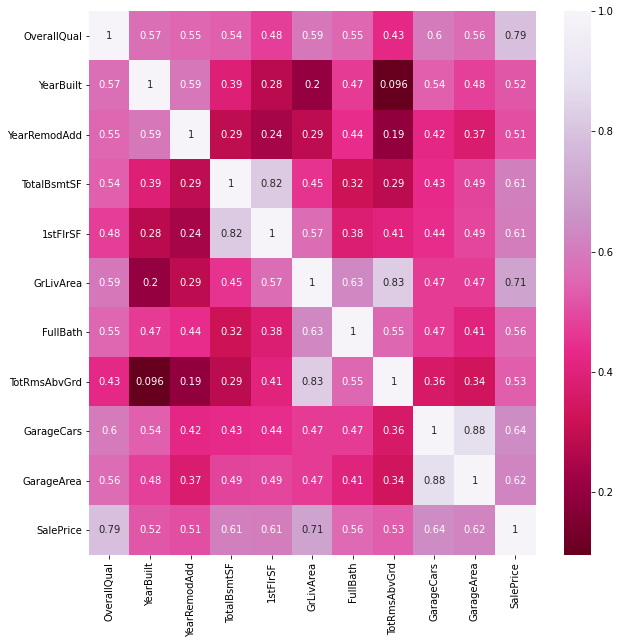

In [322]:
highest_corr_features = corrMatrix.index[abs(corrMatrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[highest_corr_features].corr(),annot=True,cmap="PuRd_r")

TotalBsmtSF and 1stFlrSF have strong correlation of .82
GrLivArea and TotRmsAbvGrd have strong correlation of .83
GarageCars and GarageArea have strong correlation of .88

In [323]:
# Checking the highly correlated features with SalePrice column
corrList = corrMatrix['SalePrice'].sort_values(ascending = False)
corrList

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [324]:
#Following are the fields having correlation less than 10% with Sale Price. We can drp these fields from final dataset later
corrList[corrMatrix['SalePrice']<.10]

PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

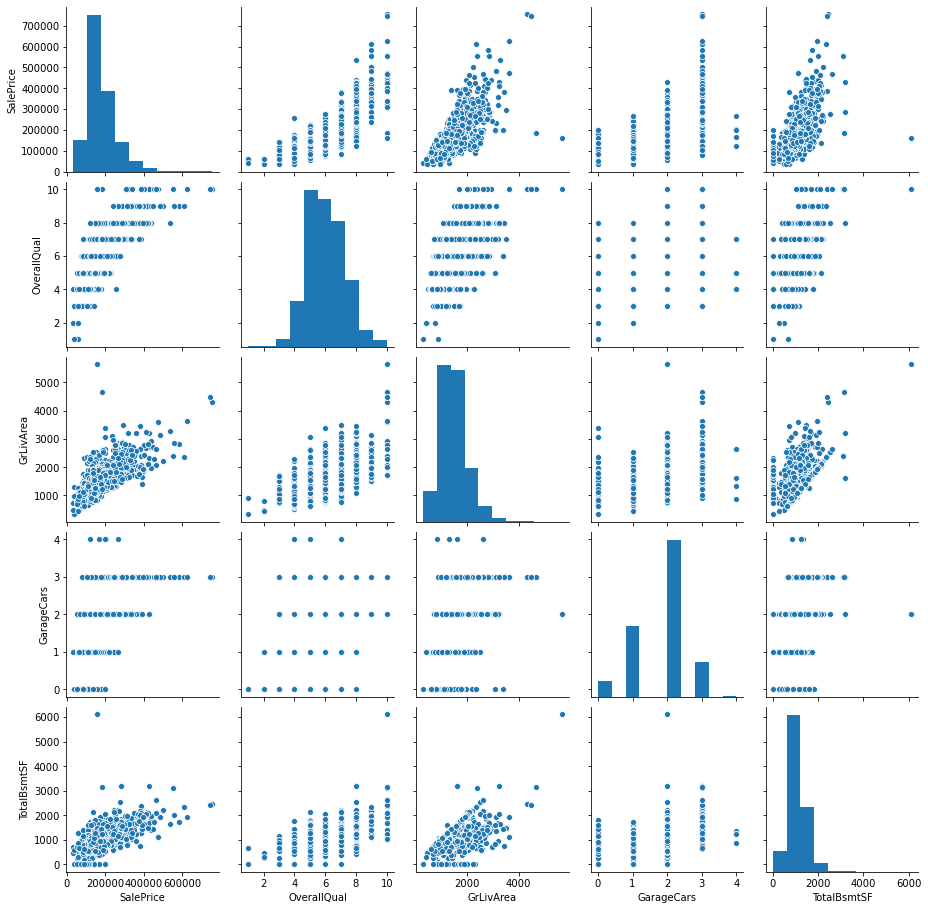

In [325]:
#Let's analyze the plots for some top correlated fields 
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF']
sns.pairplot(train_data[cols])

Let's analyze scatter plot of some features which are having high correlation with Target Value

Text(0.5, 1.0, 'Scatter plot for Living Area Vs Sale Price')

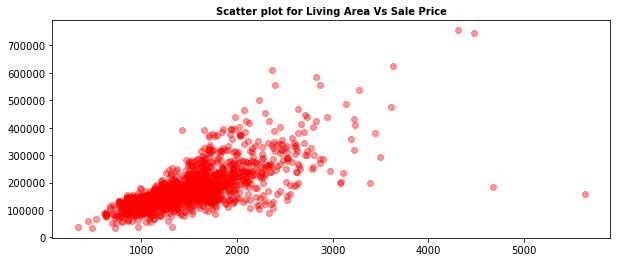

In [326]:
plt.figure(figsize = ((10, 4)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = train_data, color='red', alpha=0.4)
plt.title('Scatter plot for Living Area Vs Sale Price', weight = 'bold', fontsize = 10)

Text(0.5, 1.0, 'Scatter plot for Garage Area Vs Sale Price')

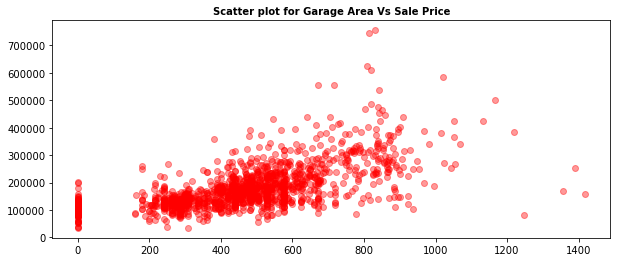

In [327]:
plt.figure(figsize = ((10, 4)))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = train_data, color='red', alpha=0.4)
plt.title('Scatter plot for Garage Area Vs Sale Price', weight = 'bold', fontsize = 10)

Text(0.5, 1.0, 'Scatter plot for YearBuilt Vs Sale Price')

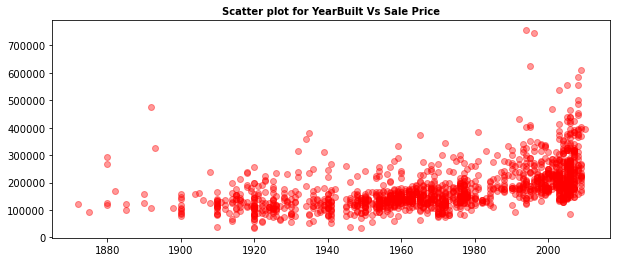

In [328]:
# The newer the house, sale price is more
plt.figure(figsize = ((10, 4)))
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data = train_data, color='red', alpha=0.4)
plt.title('Scatter plot for YearBuilt Vs Sale Price', weight = 'bold', fontsize = 10)

In [344]:
#Let's combine train and test data for missing value handling and Feature selection only

Y_train = Y_trans
y = Y_train
total_data = pd.concat((train_data, test_data), sort = False)
total_feature = total_data.drop(['Id','SalePrice'], axis = 1) #drop Sale Price column




In [330]:
total_feature

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


In [345]:
total_feature.shape

(2919, 75)

In [346]:
# Missing data checking
Total = total_feature.isnull().sum().sort_values(ascending=False)
percent = (total_feature.isnull().sum() / total_feature.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471
GarageType,157,0.053786
BsmtCond,82,0.028092
BsmtExposure,82,0.028092
BsmtQual,81,0.027749


In [347]:
total_feature.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)


In [348]:
# filling the missing numeric data with value of 0
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    total_feature[feature] = total_feature[feature].fillna(0)

In [349]:
#filling following categorical data
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    total_feature[feature] = total_feature[feature].fillna(total_feature[feature].mode()[0])

In [350]:
#As for some numerical features, NA signified it doesn't exist, missing value will be replaced by 0
#total_feature['GarageYrBlt'] = total_feature['GarageYrBlt'].fillna(0)
total_feature['Utilities'] = total_feature['Utilities'].fillna(total_feature['Utilities'].mode()[0])
total_feature['Functional'] = total_feature['Functional'].fillna(total_feature['Functional'].mode()[0])


In [351]:
#No more missing values in the dataset
missing = np.sum(total_feature.isnull())
missing[missing>0].sort_values(ascending = False)

Series([], dtype: int64)

In [352]:
#Feature Engineering - Added some new features which are always helpful to understand the overall house features

total_feature['TotalSF'] = total_feature['TotalBsmtSF'] + total_feature['1stFlrSF'] + total_feature['2ndFlrSF']
total_feature['Total_Bathrooms'] = (total_feature['FullBath'] + (0.5 * total_feature['HalfBath']) +
                                   total_feature['BsmtFullBath'] + (0.5 * total_feature['BsmtHalfBath'])) 
total_feature['YearsSinceRemodel'] = total_feature['YrSold'].astype(int) - total_feature['YearRemodAdd'].astype(int)
total_feature['HasGarage'] = total_feature['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
total_feature['HasPool'] = total_feature['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [353]:
#Dropping PoolArea as it has imbalanced data
total_feature = total_feature.drop(['PoolArea'], axis = 1) #drop PoolArea column

In [354]:
total_feature.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_Bathrooms,YearsSinceRemodel,HasGarage,HasPool
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706.0,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,2.0,548.0,Y,0,61,0,0,0,0,2,2008,WD,Normal,2566.0,3.5,5,1,0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978.0,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,2.0,460.0,Y,298,0,0,0,0,0,5,2007,WD,Normal,2524.0,2.5,31,1,0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486.0,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,2.0,608.0,Y,0,42,0,0,0,0,9,2008,WD,Normal,2706.0,3.5,6,1,0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216.0,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,3.0,642.0,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,2473.0,2.0,36,1,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655.0,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,3.0,836.0,Y,192,84,0,0,0,0,12,2008,WD,Normal,3343.0,3.5,8,1,0


## No more missing values; all values are imputed accordingly

In [356]:
categorical = total_feature.select_dtypes(include=['object'])
categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [357]:
#Creating dummies for categorical values
total_feature = pd.get_dummies(total_feature)
total_feature.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,TotalSF,Total_Bathrooms,YearsSinceRemodel,HasGarage,HasPool,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,2,2008,2566.0,3.5,5,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,5,2007,2524.0,2.5,31,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,9,2008,2706.0,3.5,6,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,2,2006,2473.0,2.0,36,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,12,2008,3343.0,3.5,8,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [358]:
total_feature.shape

(2919, 224)

In [359]:
pd.set_option('max_columns', 100)

In [213]:
#total_feature['MSSubClass'] = total_feature['MSSubClass'].apply(int)
total_feature['MoSold'] = total_feature['MoSold'].astype(int)
total_feature['YrSold'] = total_feature['YrSold'].astype(int)

KeyError: 'MoSold'

In [360]:
#Dropping the folowing columns as these will not have much impact on model
total_feature = total_feature.drop(['MiscVal', 'HasPool', '3SsnPorch','LowQualFinSF', 'KitchenAbvGr','BsmtHalfBath', 'BsmtFinSF2', 'EnclosedPorch'], axis = 1)

In [361]:
total_feature.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,TotalSF,Total_Bathrooms,YearsSinceRemodel,HasGarage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,150.0,856.0,856,854,1710,1.0,2,1,3,8,0,2.0,548.0,0,61,0,2,2008,2566.0,3.5,5,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,284.0,1262.0,1262,0,1262,0.0,2,0,3,6,1,2.0,460.0,298,0,0,5,2007,2524.0,2.5,31,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486.0,434.0,920.0,920,866,1786,1.0,2,1,3,6,1,2.0,608.0,0,42,0,9,2008,2706.0,3.5,6,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216.0,540.0,756.0,961,756,1717,1.0,1,0,3,7,1,3.0,642.0,0,35,0,2,2006,2473.0,2.0,36,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655.0,490.0,1145.0,1145,1053,2198,1.0,2,1,4,9,1,3.0,836.0,192,84,0,12,2008,3343.0,3.5,8,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [362]:
# Splitting the train and test excel data after pre-processing. 
# We will use train excel data for training and test excel data will be used for prediction and submission
X_train = total_feature.iloc[:len(Y_train), :]
test = total_feature.iloc[len(Y_train):, :]

In [363]:
# Checking size before spitting data
X_train.shape,Y_train.shape,test.shape

((1460, 216), (1460,), (1459, 216))

In [364]:
X_train.shape

(1460, 216)

In [365]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [366]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [367]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=42, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))
print(f"Train RMSE for Linear Regression: {sqrt(mean(absolute(scores)))}")

#build Lasso linear regression model
model = Lasso()

scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))
print(f"Train RMSE for Lasso Regression: {sqrt(mean(absolute(scores)))}")

#build Ridge linear regression model
model = Ridge()

scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))
print(f"Train RMSE for Ridge Regression: {sqrt(mean(absolute(scores)))}")




Train RMSE for Linear Regression: 249.76243212970564
Train RMSE for Lasso Regression: 0.20103051417687628
Train RMSE for Ridge Regression: 0.14241075168354156


In [368]:
# tuning alpha value for lasso regression
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,2,20)
for alpha in alphaRange:
    ls.set_params(alpha=alpha, normalize=True, max_iter=2000)  
    ls.fit(X_train, Y_train)
    train_R2.append(ls.score(X_train, Y_train))
    #test_R2.append(lasso.score(testX, testY))

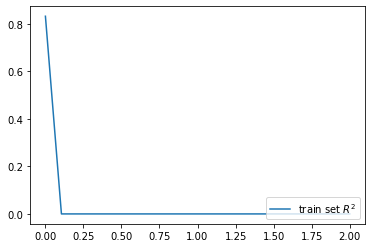

In [369]:
#R-square drops on alpha range
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
#plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [370]:
ls=Lasso()


ls.set_params(normalize=False)
coefs_lasso  = []
scores = []

ls.set_params(alpha=0.001)
ls.fit(X_train, Y_train)
pred = ls.predict(X_train)
print("R^2 for train set: %f" %ls.score(X_train, Y_train))
print(f"Train RMSE: {np.sqrt(mean_squared_error(Y_train, pred))}")
#lm.coef_
print('-'*50)
# pred1 = ls.predict(X_test)
# print("R^2 for test  set: %f" %ls.score(X_test, Y_test))
# print(f"Test RMSE: {np.sqrt(mean_squared_error(Y_test, pred1))}")
# print('-'*50)

R^2 for train set: 0.907402
Train RMSE: 0.12151061395205648
--------------------------------------------------


In [371]:
lassoCoef = pd.Series(ls.coef_, index=total_feature.columns)
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
sortedCoefs

RoofMatl_ClyTile        0.565928
MSZoning_C (all)        0.191673
Neighborhood_Crawfor    0.094539
Neighborhood_StoneBr    0.071938
OverallQual             0.068751
                          ...   
Exterior1st_Plywood     0.000000
Exterior1st_ImStucc     0.000000
Exterior1st_HdBoard     0.000000
Exterior1st_CemntBd     0.000000
HouseStyle_SFoyer       0.000000
Length: 216, dtype: float64

Text(0.5, 1.0, 'Feature Importance Plot for lasso regression')

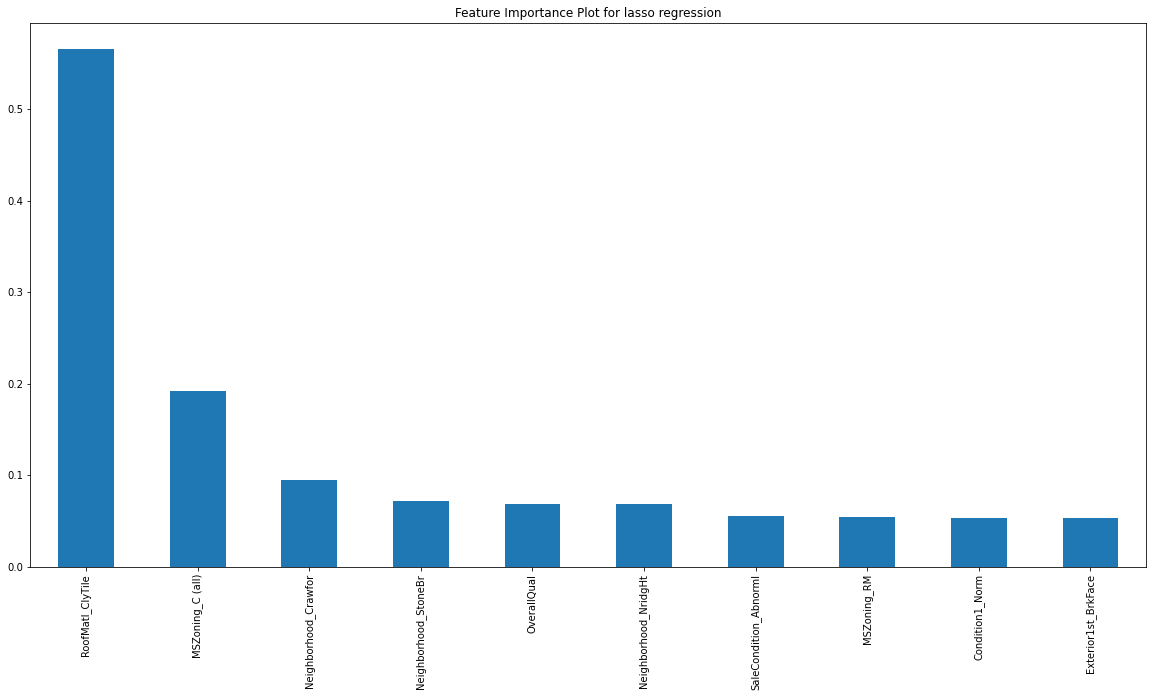

In [372]:
plt.figure(figsize = ((15, 8)))
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
sortedCoefs.head(10).plot.bar(x='feature_name',y='importance_score', legend=None, figsize = (20, 10))
plt.title('Feature Importance Plot for lasso regression')

In [373]:
# Ridge regression model

from sklearn.linear_model import Ridge
ridge = Ridge()
alphas = np.linspace(1e-3,2,20)
ridge.set_params(normalize=False)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train, Y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, Y_train))
coefs = pd.DataFrame(coefs, index = alphas, columns = total_feature.columns)  
coefs.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,TotalSF,Total_Bathrooms,YearsSinceRemodel,HasGarage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0.001000,-0.000394,0.000003,0.048358,0.036332,0.001816,-0.000335,0.000043,-0.000031,0.000067,0.000002,-0.000033,0.000221,0.018059,0.004305,0.013576,0.003576,0.002319,0.024158,0.022705,0.000110,0.000094,0.000071,0.000265,-0.001373,-0.001442,0.000036,0.013183,-0.001107,0.021410,-0.327971,0.103686,0.082956,0.088848,0.052481,-0.060164,0.060164,-0.010313,0.015615,0.002331,-0.007633,-0.015465,0.024991,-0.021447,0.011921,0.114976,-0.114976,0.023340,0.046923,-0.009224,-0.070822,...,-0.030189,0.117686,-0.121045,-0.114214,0.021394,0.081885,-0.126373,0.001158,0.136150,0.027021,-0.002968,0.005571,-0.020110,-0.009513,-0.029591,0.029591,-0.000878,-0.007915,-0.060817,0.084133,-0.014524,0.046718,-0.010499,-0.015968,-0.020251,0.078705,-0.152572,0.103318,0.098994,0.005430,-0.281424,0.147549,-0.011429,0.001399,0.010030,-0.050023,0.025939,0.044039,0.089208,-0.089572,-0.052502,0.078280,0.025499,-0.070868,-0.038575,0.083471,0.025108,-0.029467,0.028776,-0.069314
0.106211,-0.000426,0.000003,0.049977,0.035803,0.001693,-0.000408,0.000038,-0.000030,0.000062,0.000001,-0.000034,0.000223,0.016470,0.001553,0.011473,0.004156,0.003118,0.024999,0.028233,0.000094,0.000095,0.000068,0.000267,-0.001353,-0.001567,0.000029,0.018715,-0.001159,0.019543,-0.323613,0.101677,0.082859,0.087220,0.051857,-0.057385,0.057385,-0.004450,0.020897,-0.014257,-0.002190,-0.021301,0.024563,-0.014505,0.011243,0.113729,-0.113729,0.022766,0.049356,-0.010011,-0.071397,...,-0.040476,0.114619,-0.108212,-0.110360,0.020826,0.087780,-0.121888,-0.005328,0.128971,0.028233,-0.002058,0.006253,-0.023923,-0.008504,-0.030167,0.030167,-0.001830,-0.008020,-0.047369,0.072827,-0.015608,0.048101,-0.013462,-0.014948,-0.019692,0.070687,-0.157616,0.095193,0.091327,0.006814,-0.246395,0.139990,-0.013050,0.002486,0.010564,-0.051519,0.026930,0.042145,0.087606,-0.086204,-0.053343,0.077954,0.027926,-0.071495,-0.038377,0.079318,0.027342,-0.028628,0.030388,-0.070043
0.211421,-0.000448,0.000002,0.051148,0.035491,0.001607,-0.000465,0.000035,-0.000029,0.000057,0.000001,-0.000034,0.000223,0.015400,-0.000211,0.010162,0.004542,0.003763,0.025591,0.032206,0.000082,0.000096,0.000065,0.000268,-0.001340,-0.001669,0.000025,0.022635,-0.001203,0.018292,-0.319173,0.099948,0.082318,0.085789,0.051118,-0.055456,0.055456,-0.000321,0.024736,-0.026062,0.001646,-0.025447,0.024479,-0.009971,0.010939,0.111143,-0.111143,0.022216,0.050828,-0.010688,-0.071191,...,-0.047295,0.111499,-0.098831,-0.105275,0.020080,0.091094,-0.118779,-0.009480,0.122361,0.028785,-0.001748,0.006465,-0.025512,-0.007991,-0.030539,0.030539,-0.002008,-0.007577,-0.037775,0.063215,-0.015855,0.048962,-0.015322,-0.

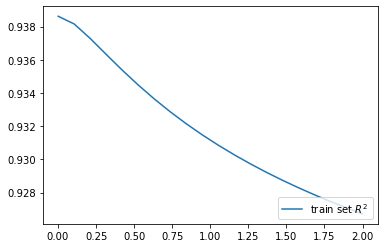

In [374]:
#R-square drops on alpha range
plt.plot(alphaRange, scores, label=r'train set $R^2$')
#plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [375]:
ridge = Ridge()


ridge.set_params(normalize=False)
coefs_ridge  = []
scores = []

ridge.set_params(alpha=0.01)
ridge.fit(X_train, Y_train)
pred = ridge.predict(X_train)

print("R^2 for train set: %f" %ridge.score(X_train, Y_train))
print(f"Train RMSE: {np.sqrt(mean_squared_error(Y_train, pred))}")
print('-'*50)

R^2 for train set: 0.938613
Train RMSE: 0.09893515804702017
--------------------------------------------------


In [376]:
ridgeCoef = pd.Series(ridge.coef_, index=total_feature.columns)
sortedCoefs = np.abs(ridgeCoef).sort_values(ascending=False)
sortedCoefs

RoofMatl_ClyTile    2.299393
Condition2_PosN     0.701049
RoofMatl_Membran    0.593223
RoofMatl_Metal      0.411175
RoofMatl_WdShngl    0.343676
                      ...   
TotalSF             0.000035
2ndFlrSF            0.000033
BsmtUnfSF           0.000031
LotArea             0.000003
1stFlrSF            0.000002
Length: 216, dtype: float64

Text(0.5, 1.0, 'Feature Importance Plot for Ridge regression')

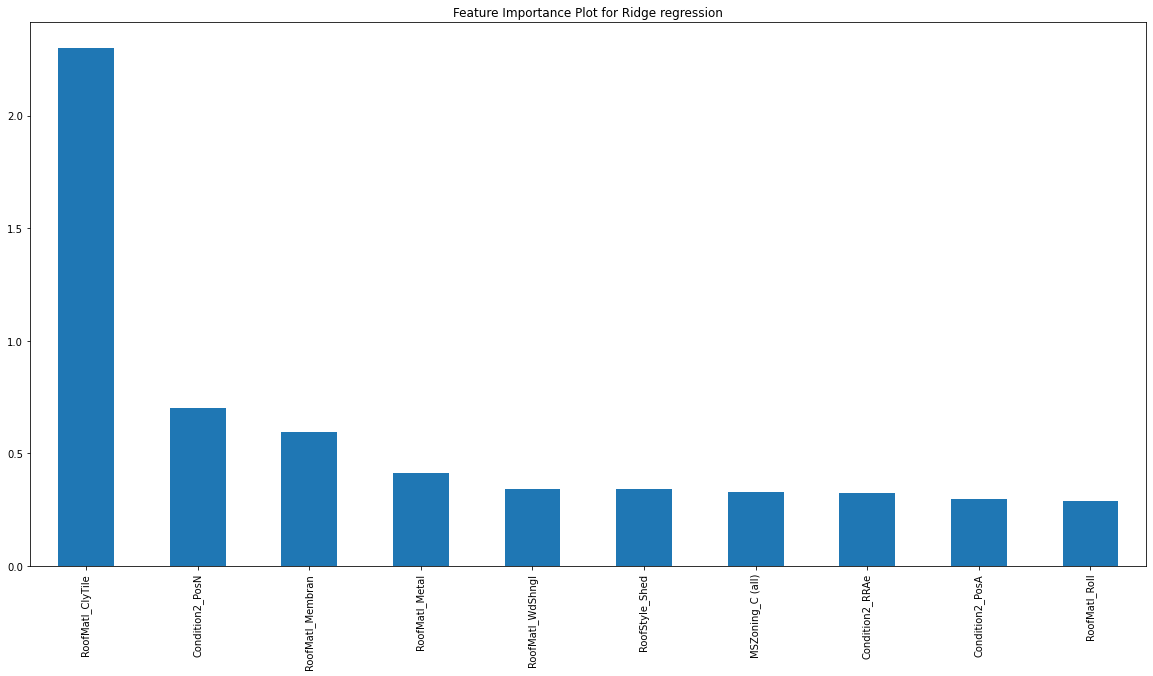

In [377]:
plt.figure(figsize = ((15, 8)))
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
sortedCoefs.head(10).plot.bar(x='feature_name',y='importance_score', legend=None, figsize = (20, 10))
plt.title('Feature Importance Plot for Ridge regression')

In [380]:
# Applying cross validation for max-depth and n-estimator values
import xgboost as xgb
xg = xgb.XGBRegressor()

from sklearn.model_selection import GridSearchCV

params = {'max_depth':(3, 4, 5),'n_estimators':(100,500, 1000)}
gs = GridSearchCV(xg, params)
gs.fit(X_train, Y_train)


# print best parameter after tuning 
print(gs.best_params_) 
#gs_predictions = gs.predict(X_test) 

{'max_depth': 3, 'n_estimators': 100}


In [381]:
# Apply XGBoosting model on train data
import xgboost as xgb
xg = xgb.XGBRegressor()

n_estimators = 100
xg.set_params(max_depth=3, n_estimators=n_estimators)
train_r2 = []
test_r2  = []
steps = range(100,1000,10)

xg.fit(X_train, Y_train)
pred = xg.predict(X_train)

print("R^2 for train set: %f" %xg.score(X_train, Y_train))
print(f"Train RMSE: {np.sqrt(mean_squared_error(Y_train, pred))}")
#lm.coef_
print('-'*50)



R^2 for train set: 0.975533
Train RMSE: 0.0624602623241032
--------------------------------------------------


In [382]:
sorted_importance = sorted(zip(total_feature.columns, xg.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('GarageCars', 0.27406406),
 ('OverallQual', 0.092311345),
 ('TotalSF', 0.08060912),
 ('Total_Bathrooms', 0.07205931),
 ('Neighborhood_OldTown', 0.045804486),
 ('MSZoning_RL', 0.033821143),
 ('Fireplaces', 0.02542924),
 ('BldgType_1Fam', 0.022991285),
 ('Heating_Grav', 0.02091909),
 ('MSZoning_C (all)', 0.019277014),
 ('YearsSinceRemodel', 0.016218688),
 ('CentralAir_N', 0.015464949),
 ('BsmtFinSF1', 0.012881973),
 ('KitchenQual_Ex', 0.010141581),
 ('SaleType_New', 0.009964958),
 ('HouseStyle_1.5Fin', 0.009764953),
 ('Neighborhood_Crawfor', 0.00932133),
 ('SaleCondition_Abnorml', 0.008458521),
 ('YearRemodAdd', 0.008404881),
 ('OverallCond', 0.00782444),
 ('Functional_Maj2', 0.00748044),
 ('SaleCondition_Family', 0.0071842135),
 ('Neighborhood_Mitchel', 0.0071837394),
 ('Functional_Typ', 0.0071051936),
 ('LotShape_Reg', 0.0068448964),
 ('1stFlrSF', 0.006117103),
 ('YearBuilt', 0.00592059),
 ('GarageArea', 0.00579854),
 ('LandContour_Bnk', 0.0054373136),
 ('RoofStyle_Gable', 0.00508409

Text(0.5, 1.0, 'Feature Importance Plot for XG Boosting')

<Figure size 1080x576 with 0 Axes>

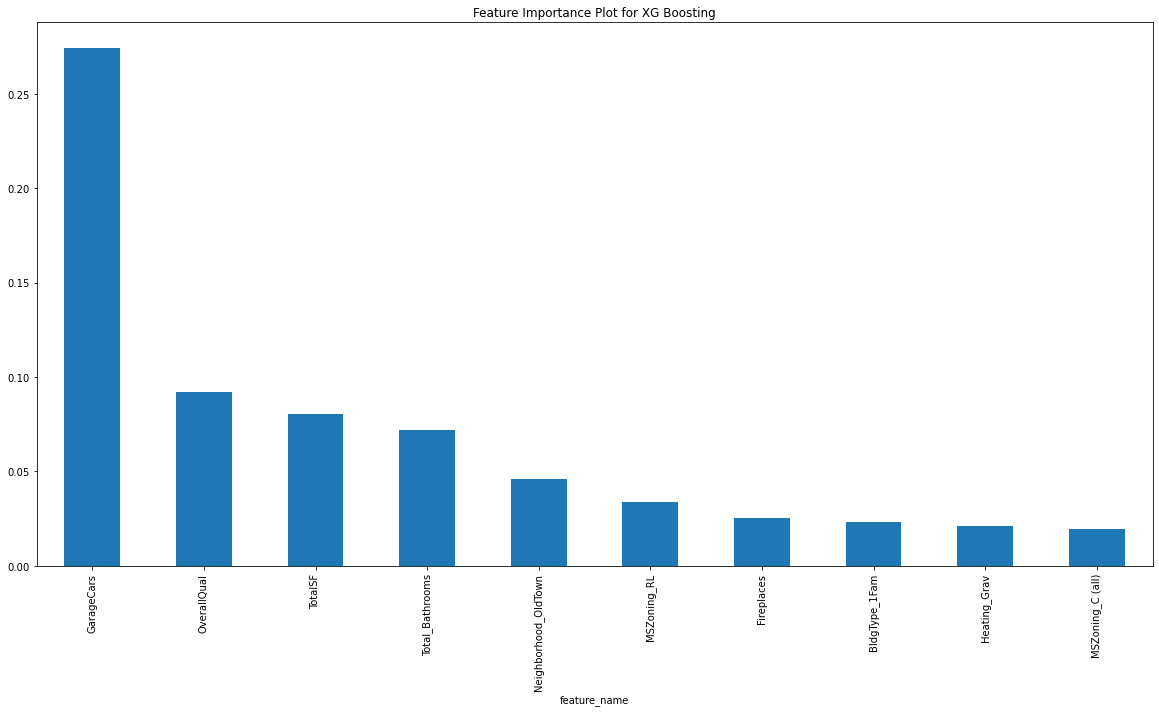

In [383]:
plt.figure(figsize = ((15, 8)))
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).head(10).plot.bar(x='feature_name',y='importance_score', legend=None, figsize = (20, 10))
plt.title('Feature Importance Plot for XG Boosting')

Based on the above mentioned model performances, Ridge and XGBoosting are the close competitors compared to MSE values.
As RMSE is lowest and important feactures are very significant and realistic for XGBoosing, The test data will be predicted with XGBoosting model.

In [384]:
Y_predict = np.floor(np.expm1(xg.predict(test)))
Y_predict

array([125406., 162623., 191116., ..., 165344., 119887., 214263.],
      dtype=float32)

In [256]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = Y_predict
sub.to_csv('Price_Predict_CM.csv',index=False)